# Ford GoBike System Data Analysis
## by Desmond Singh
### Introduction
    Ford GoBike is a public bicycle sharing system in the San Francisco Bay Area.
    The users of this platform have access available to bikes 24/7 in San Francisco, East Bay & San Jose.
    In this project, I will perform an exploratory analysis on the user utilizing this platform.



## Preliminary Wrangling

> This Analysis will explore data from Jan 2018 - May of 2019. 

# Part I : Gathering Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# This code Loads data for Jan 2018 - May 2019.
#Use a condition, to check if new_master.csv is in the current working directory.
if "new_master.csv" not in os.listdir():
    # If new_master.csv is Not in the current directory, then create it, Otherwise skip the code:
    # This is the path to the folder.
    path = r'/Users/newuser/Desktop/FordGoBikeData'
    ##### Store List of all file locations
    files = glob.glob(os.path.join(path, "*.csv"))
    ##### Load & Union the Dataset
    df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
    ##### Write Newly combined data
    df.to_csv('new_master.csv',index = False)

In [3]:
# Load Combined Data set.
df = pd.read_csv('new_master.csv')

# Part II : Assessing Data

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No
3,18558,2018-02-28 18:20:53.6210,2018-02-28 23:30:12.4500,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No
4,885,2018-02-28 23:15:12.8580,2018-02-28 23:29:58.6080,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 356.1+ MB


In [6]:
df.shape

(2916788, 16)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.916788e+06,2.904272e+06,2.916788e+06,2.916788e+06,2.904272e+06,2.916788e+06,2.916788e+06,2.916788e+06,2.756694e+06
mean,8.291636e+02,1.268337e+02,3.776796e+01,-1.223507e+02,1.252916e+02,3.776788e+01,-1.223495e+02,2.869524e+03,1.983664e+03
std,2.209655e+03,1.060968e+02,1.061977e-01,1.662807e-01,1.060852e+02,1.398874e-01,3.387826e-01,1.745911e+03,1.034861e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.470000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.400000e+01,3.777106e+01,-1.224113e+02,1.457000e+03,1.979000e+03
50%,5.510000e+02,9.200000e+01,3.778101e+01,-1.223974e+02,9.000000e+01,3.778107e+01,-1.223971e+02,2.769000e+03,1.986000e+03
75%,8.630000e+02,1.970000e+02,3.779728e+01,-1.222887e+02,1.960000e+02,3.779728e+01,-1.222902e+02,4.014000e+03,1.991000e+03
max,8.636600e+04,4.270000e+02,4.551000e+01,0.000000e+00,4.270000e+02,4.551000e+01,0.000000e+00,7.196000e+03,2.001000e+03


In [8]:
#Search for Duplicates.
df.duplicated().sum()

0

In [9]:
#Search for NAN values?
df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12516
start_station_name          12516
start_station_latitude          0
start_station_longitude         0
end_station_id              12516
end_station_name            12516
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          160094
member_gender              159737
bike_share_for_all_trip         0
dtype: int64

###  Quality Issues
- start_time & date_time are objects.
- The following columns are not in object format: start_station_id, end_station_id  &   bike_id.
- The following columns are not in category format: user type, gender and bike_share_for_all_trip.
- filter data to include reasonable age of the user.
- Enhance data set in regards to month, day, hour, weekday.

In [10]:
# Create copies of original data frame.
df_new = df.copy()

##### Define
   - Change start_time & end_time to format datetime.

##### Code:

In [11]:
df_new.start_time = pd.to_datetime(df_new.start_time)
df_new.end_time = pd.to_datetime(df_new.end_time)

##### Test:

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 356.1+ MB


##### Define:
- Changing the user_type, member_gender, and bike_share_for_all_trip to category format

##### Code:

In [13]:
df_new.user_type = df_new.user_type.astype('category')
df_new.member_gender = df_new.member_gender.astype('category')
df_new.bike_share_for_all_trip = df_new.bike_share_for_all_trip.astype('category')

##### Test:

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
dtypes: category(3), datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 297.6+ MB


##### Define:
- Changing the bike_id, start_station_id, and end_station_id to object

##### Code:

In [15]:
df_new.bike_id = df_new.bike_id.astype(str)
df_new.start_station_id = df_new.start_station_id.astype(str)
df_new.end_station_id = df_new.end_station_id.astype(str)

##### Test:

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916788 entries, 0 to 2916787
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), object(5)
memory usage: 297.6+ MB


##### Define:
- filter data to include reasonable age of the user.

##### Code:

In [17]:
#Filter data to include reasonable member age range
df_new['member_age'] = 2019-df_new['member_birth_year']


In [18]:
#Check age distribution
df_new['member_age'].describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .75, .8, .9, .95])


count    2.756694e+06
mean     3.533561e+01
std      1.034861e+01
min      1.800000e+01
10%      2.400000e+01
20%      2.700000e+01
30%      2.900000e+01
40%      3.100000e+01
50%      3.300000e+01
60%      3.500000e+01
70%      3.800000e+01
75%      4.000000e+01
80%      4.300000e+01
90%      5.100000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

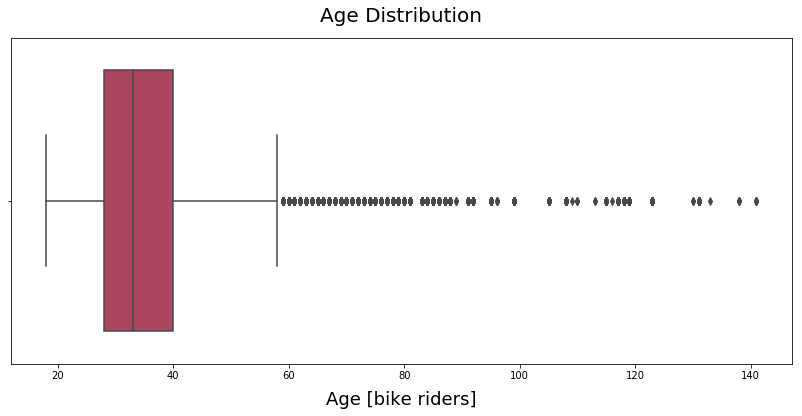

In [19]:
plt.figure(figsize=(14,6))
sb.boxplot(x='member_age', data=df_new, palette='inferno_r', orient='h')
plt.title("Age Distribution", fontsize=20, y=1.03)
plt.xlabel("Age [bike riders]", fontsize=18, labelpad=10)
plt.savefig('image01.png');

#### The distribution of Riders shows Ages from 18 to 141. The Average age of Bike riders is 35.3. Since 95% of users are under the age of 57, it is better to remove anyone over the age of 65.

In [20]:
df_new = df_new[df_new['member_age']<=65]

In [21]:
df_new['member_age'].mean()

34.969933113086704

##### The average age of member drops from 35.3 to 34.9 after only including focusing on 65 and under.

##### Test:

In [22]:
df_new.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age
count,2.730878e+06,2.730878e+06,2.730878e+06,2.730878e+06,2.730878e+06,2.730878e+06,2.730878e+06
mean,7.669450e+02,3.776741e+01,-1.223496e+02,3.776729e+01,-1.223483e+02,1.984030e+03,3.496993e+01
std,1.893060e+03,1.076612e-01,1.697948e-01,1.429874e-01,3.491196e-01,9.609862e+00,9.609862e+00
min,6.100000e+01,0.000000e+00,-1.224737e+02,0.000000e+00,-1.224737e+02,1.954000e+03,1.800000e+01
25%,3.420000e+02,3.777041e+01,-1.224117e+02,3.777106e+01,-1.224108e+02,1.979000e+03,2.800000e+01
50%,5.410000e+02,3.778101e+01,-1.223974e+02,3.778107e+01,-1.223971e+02,1.986000e+03,3.300000e+01
75%,8.390000e+02,3.779728e+01,-1.222856e+02,3.779728e+01,-1.222887e+02,1.991000e+03,4.000000e+01
max,8.628100e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00,2.001000e+03,6.500000e+01


##### Define:
- Add columns for the start month, day of the week, and hour

##### Code:

In [23]:
# extract start time month name
df_new['start_time_month']=df_new['start_time'].dt.strftime('%B')

In [24]:
# extract start time month number
df_new['start_time_month_num']=df_new['start_time'].dt.month.astype(int)

In [25]:
# extract start time weekdays
df_new['start_time_weekday']=df_new['start_time'].dt.strftime('%a')

In [26]:
# extract start time day
df_new['start_time_day']=df_new['start_time'].dt.day.astype(int)

In [27]:
# extract start and end time hour
df_new['start_time_hour']=df_new['start_time'].dt.hour
df_new['end_time_hour'] = df_new['end_time'].dt.hour

##### Test:

In [28]:
df_new.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month,start_time_month_num,start_time_weekday,start_time_day,start_time_hour,end_time_hour
182202,666,2018-11-10 13:10:53.784,2018-11-10 13:22:00.154,74.0,Laguna St at Hayes St,37.776435,-122.426244,350.0,8th St at Brannan St,37.771431,...,1994.0,Male,No,25.0,November,11,Sat,10,13,13
1370733,774,2018-12-13 08:51:07.313,2018-12-13 09:04:02.108,66.0,3rd St at Townsend St,37.778742,-122.392741,98.0,Valencia St at 16th St,37.765052,...,1981.0,Female,No,38.0,December,12,Thu,13,8,9
2060932,703,2018-07-07 14:56:24.648,2018-07-07 15:08:08.488,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,240.0,Haste St at Telegraph Ave,37.866043,...,1977.0,Male,No,42.0,July,7,Sat,7,14,15
2106880,992,2018-08-30 13:50:32.338,2018-08-30 14:07:04.353,116.0,Mississippi St at 17th St,37.764802,-122.394771,8.0,The Embarcadero at Vallejo St,37.799953,...,1975.0,Male,No,44.0,August,8,Thu,30,13,14
687341,639,2018-06-27 18:51:41.795,2018-06-27 19:02:21.081,85.0,Church St at Duboce Ave,37.770083,-122.429156,112.0,Harrison St at 17th St,37.763847,...,1989.0,Male,No,30.0,June,6,Wed,27,18,19
1563447,189,2019-05-24 18:16:28.931,2019-05-24 18:19:38.740,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,268.0,Ellsworth St at Russell St,37.857490,...,1997.0,Male,No,22.0,May,5,Fri,24,18,18
1463641,694,2018-01-22 17:51:34.435,2018-01-22 18:03:08.859,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,93.0,4th St at Mission Bay Blvd S,37.770407,...,1989.0,Male,No,30.0,January,1,Mon,22,17,18
1212686,330,2018-05-15 16:52:18.046,2018-05-15 16:57:48.973,181.0,Grand Ave at Webster St,37.811377,-122.265192,197.0,El Embarcadero at Grand Ave,37.808848,...,1992.0,Female,No,27.0,May,5,Tue,15,16,16
231856,766,2018-11-02 08:54:37.939,2018-11-02 09:07:24.784,16.0,Steuart St at Market St,37.794130,-122.394430,90.0,Townsend St at 7th St,37.771058,...,1991.0,Male,No,28.0,November,11,Fri,2,8,9
81775,1012,2018-02-07 08:20:23.699,2018-02-07 08:37:15.986,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,14.0,Clay St at Battery St,37.795001,...,1982.0,Female,No,37.0,February,2,Wed,7,8,8


In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2730878 entries, 0 to 2916787
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 float64
start_time_month           object
start_time_month_num       int64
start_time_weekday         object
start_time_day             int64
start_time_hour            int64
end_time_hour              int64
dtypes: category(3), datetime64[ns](2), float64(6), int64(5), object(7)
memory usa

In [30]:
df_new.shape

(2730878, 23)

### What is the structure of your dataset?

> There are 2730878 bike rides in the data set with 23 features. Most Variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> I am interested in understanding which age and which gender utilizes the service more. I want see which days/weekday/months are in high demand. I want to see whether members or casual riders utilize the service the most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will most likely utilize the start and end times as well as any time-based information. I will also focuse on the customer related data.

## Univariate Exploration

> In this section, investigate distributions of individual variables. 

In [31]:
df_new.start_time_month.describe()

count     2730878
unique         12
top         April
freq       346920
Name: start_time_month, dtype: object

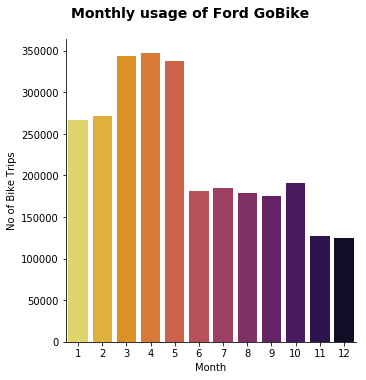

In [32]:
# Monthly usage of Ford GoBike System
usage_map = sb.catplot(data=df_new, x='start_time_month_num', kind='count', palette='inferno_r');
usage_map.set_axis_labels("Month", "No of Bike Trips")
usage_map.fig.suptitle('Monthly usage of Ford GoBike', y=1.05, fontsize=14, fontweight='semibold');
#usage_map.set_xticklabels(rotation=30)


The plot shows the demand is high during The earlier part of the year, especially Mar, Apr, May. We can see that the demand goes down After may. The plot shows the demand for the system is the lowerst during Nov and Dec.

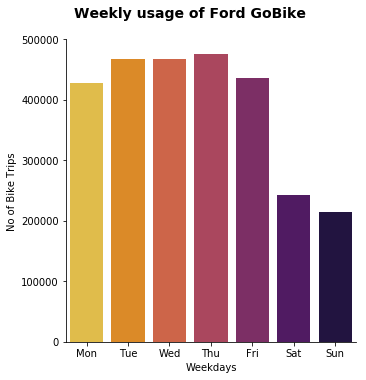

In [33]:
# Weekly usage of Ford GoBike System
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
usage_map = sb.catplot(data=df_new, x='start_time_weekday', kind='count', palette='inferno_r', order = weekday)
usage_map.set_axis_labels("Weekdays", "No of Bike Trips")
usage_map.fig.suptitle('Weekly usage of Ford GoBike', y=1.05, fontsize=14, fontweight='semibold');

The Plot shows that system is utilize more during weekdays Mon - Fri.

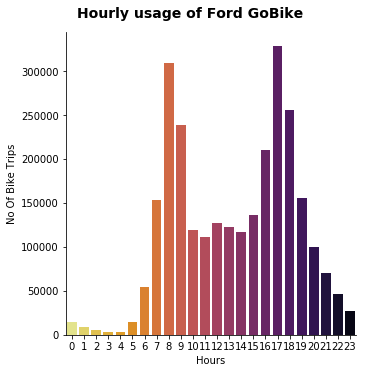

In [34]:
# Hourly usage of Ford GoBike System
usage_map= sb.catplot(data=df_new, x='start_time_hour', kind='count', palette='inferno_r')
usage_map.set_axis_labels("Hours", "No Of Bike Trips")
usage_map.fig.suptitle('Hourly usage of Ford GoBike', y=1.03, fontsize=14, fontweight='semibold');

The plow shows that the system is used mainly around 8-9am and 5-6pm. This distribution is bimodal.



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> What interest me the most was the usage of the system during the summer months. We could conclude that as it gets colder the usage decreases.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> when looking at the member age, There were few members that were past the age of 65, and some were older than 100 years of age. Since 95% of memberes were under the age of 57, I only included members upto the age of 65. 

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the data.

In [37]:

# Calculating customers vs subscribers.
subscriber = df_new.query('user_type == "Subscriber"')['bike_id'].count()
customer = df_new.query('user_type == "Customer"')['bike_id'].count()

subscriber_proportion = subscriber / df_new['bike_id'].count()
customer_proportion = customer / df_new['bike_id'].count()

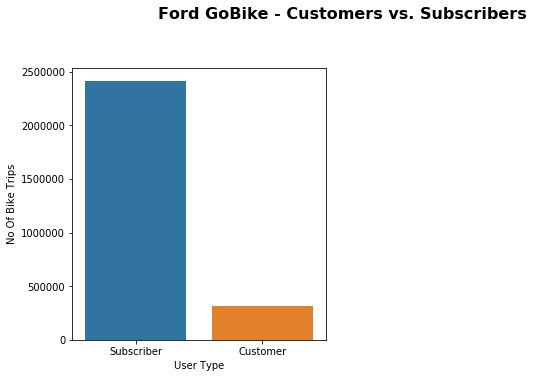

In [38]:
# Customer vs Subscriber Bar Chart
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

usage_map = sb.countplot(data=df_new, x="user_type", order=df_new.user_type.value_counts().index)
usage_map.set_xlabel('User Type')
usage_map.set_ylabel('No Of Bike Trips')

plt.suptitle('Ford GoBike - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='semibold');


This Plot shows the bike sharing system is used mainly by Subscribers.

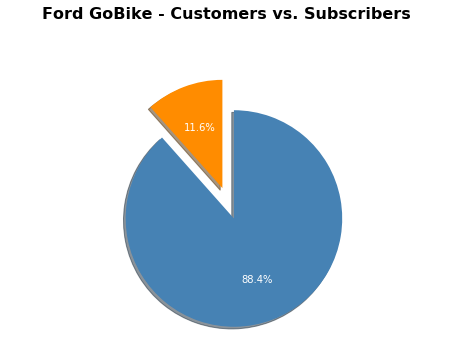

In [39]:
# Customers vs Subscribers pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_proportion, subscriber_proportion]
explode = (0, 0.3)
colors = ['darkorange', 'steelblue']


plt.pie(size, explode=explode, labels = labels, colors = colors, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='semibold');


This Pie chart shows 88.4% usage is from subscribers, The customers use 11.6%.

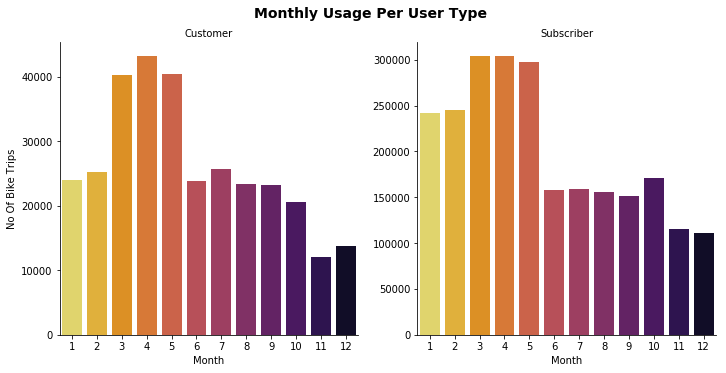

In [40]:
# monthly Usage per user type
usage_map = sb.catplot(data=df_new, x='start_time_month_num', col="user_type", kind='count', sharey = False,
            palette='inferno_r')
usage_map.set_axis_labels("Month", "No Of Bike Trips")
usage_map.set_titles("{col_name}")
usage_map.fig.suptitle('Monthly Usage Per User Type', y=1.03, fontsize=14, fontweight='semibold');


For customers the bike renting is in high demand for months Mar - May.
For Subscribers the high demand is in Mar- May as well but, Jan and Feb is also quite busy.
After May the usage for both decreases, and it is the lowest during the winter months. 

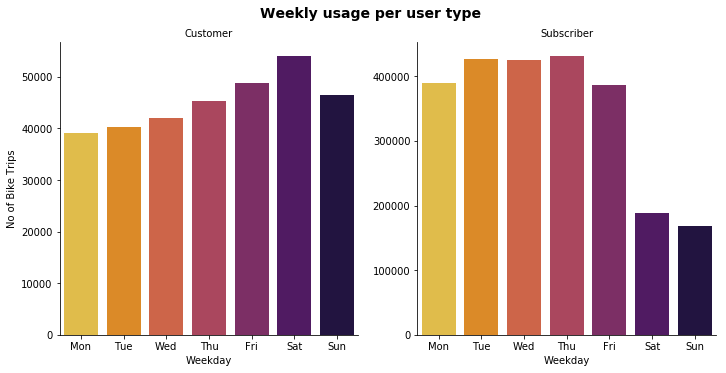

In [41]:
# weekday usage per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
usage_map  = sb.catplot(data=df_new, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            palette='inferno_r', order = weekday)
usage_map .set_axis_labels("Weekday", "No of Bike Trips")
usage_map .set_titles("{col_name}")
usage_map .fig.suptitle('Weekly usage per user type', y=1.03, fontsize=14, fontweight='semibold');

The plot shows us that Usage for Customers is higher Th - Sun. Whereas for subscriber usage is higher Mon - Fri. 

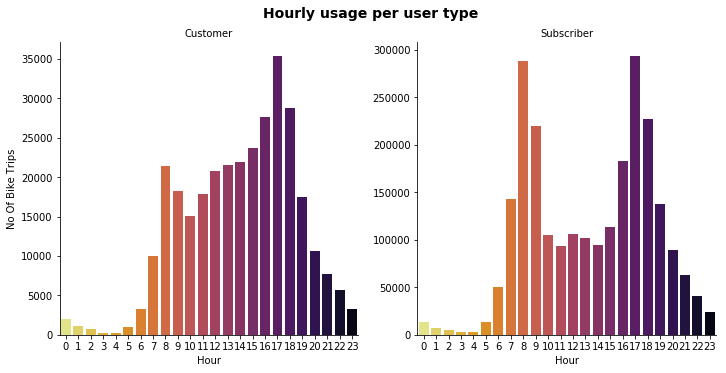

In [42]:
# hourly usage per user type

usage_map = sb.catplot(data=df_new, x='start_time_hour', col="user_type", kind='count', sharey = False,
            palette='inferno_r',)
usage_map.set_axis_labels("Hour", "No Of Bike Trips")
usage_map.set_titles("{col_name}")
usage_map.fig.suptitle('Hourly usage per user type', y=1.03, fontsize=14, fontweight='semibold');

The Plot shows us that Customers utilize the service more during 8AM-7PM.
Subscribers utilize the service more during 7AM-9AM and 4PM-6PM.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When looking at the user_type we are able to see different usages of the services between customers and subscribers. Customers are more casuals and utilize the renting service mainly in summer and more often during weekends and mostly between 8AM-7PM. Whereas subscribers are daily commuters who also utilize the service more during the summertime. One difference with Subscribers is that they rent more during the weekdays, and usually earlier in the day 7AM-9AM and Later the evening around 4PM-6PM.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> 88.4% of the usage is from the Subscribers, and remaining 11.6% is from Customers.

## Multivariate Exploration

> In this Section i will look at another variable to make the Exploration multivariate by adding Gender. 

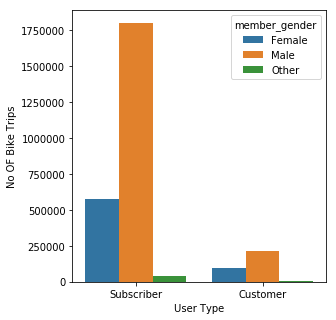

In [43]:

plt.figure(figsize = [10, 5])

# Gender bar chart
plt.subplot(1, 2, 1)

usage_map = sb.countplot(data=df_new, x="user_type", hue="member_gender", order=df_new.user_type.value_counts().index)
usage_map.set_xlabel('User Type')
usage_map.set_ylabel('No OF Bike Trips');

The plot shows us that For bother Customers and Subscribers, Males utilize the service more.

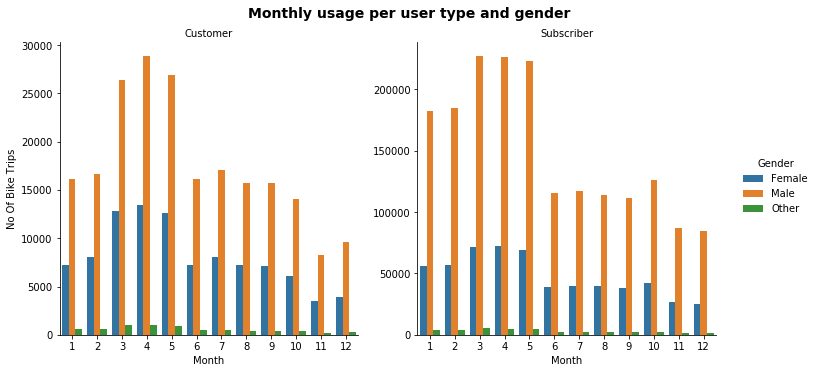

In [44]:
# monthly usage per user type and gender

usage_map = sb.catplot(data=df_new, x='start_time_month_num', col="user_type", hue="member_gender", kind='count', sharey = False)
usage_map.set_axis_labels("Month", "No Of Bike Trips")
usage_map._legend.set_title('Gender')
usage_map.set_titles("{col_name}")
usage_map.fig.suptitle('Monthly usage per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

For Both genders in customer plot the bike renting is in high demand for months Mar - May. For Subscribers for bother genders the high demand is in Mar- May as well but, Jan and Feb is also quite busy.

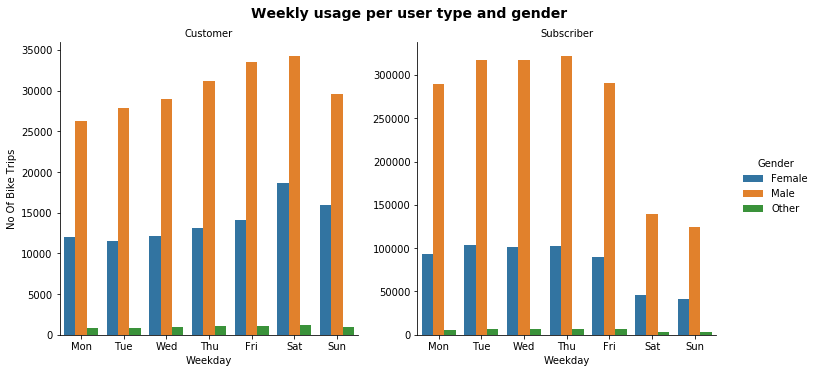

In [45]:

# weekday usage per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
usage_map = sb.catplot(data=df_new, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
usage_map.set_axis_labels("Weekday", "No Of Bike Trips")
usage_map._legend.set_title('Gender')
usage_map.set_titles("{col_name}")
usage_map.fig.suptitle('Weekly usage per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


In the customer Plot, Both genders use the service more  during the weekends, One thing to note Jump in the usage by females is alot higher when compared to the whole week. 
In the subscriber plot Both Genders utilize the services more during the weekdays.

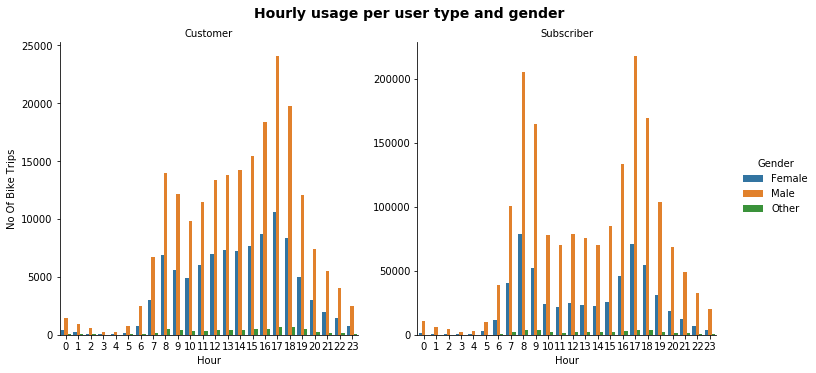

In [46]:
# hourly usege per user type and gender

usage_map = sb.catplot(data=df_new, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
usage_map.set_axis_labels("Hour", "No Of Bike Trips")
usage_map._legend.set_title('Gender')
usage_map.set_titles("{col_name}")
usage_map.fig.suptitle('Hourly usage per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


During the day, both Genders utilize the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers Utilize system at around 7AM-9AM and 4PM-7PM when they go and come back from work.

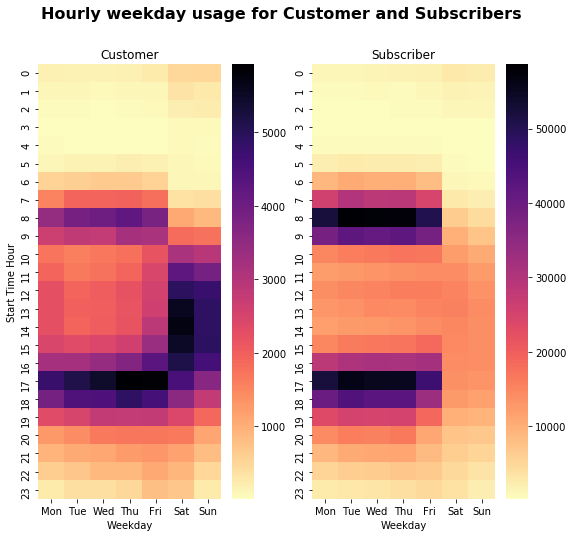

In [47]:

# Setting the weekday order
df_new['start_time_weekday'] = pd.Categorical(df_new['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly weekday usage for Customer and Subscribers', fontsize=16, fontweight='bold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_cust = df_new.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_cust = df_cust.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_cust, cmap="magma_r")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_sub = df_new.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_sub = df_sub.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(df_sub, cmap="magma_r")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

Customer Plot:
During weekdays: Service usage is higher during 8AM - 9AM and 4PM-6PM.
During weekend: Service usage is high between 10AM - 6PM.

Subscirber Plot: 
During weekday: Service usage is high during 7AM - 9AM and 4PM - 7PM
Durin weekend: Service is usage is low on weekends, No significant effect of day time noticed on weekends.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Using Heatmaps to plot when bikes rented throughout the day help me understand the behavior of bother customer and subscribers. Heatmaps made it clear to visualize the behavior pattern of Subscriber more clearly as dark colors show smore activity between 7AM - 9AM & 4PM - 6PM.
When comparing both heatmaps we can easily see that the customers commute more during the weekend (10AM-6PM)
### Were there any interesting or surprising interactions between features?

> We can easily see that Male Gender utilize the Ford GoBike service more for both customer and subscriber user_type. 
The same trend can be seen for the Female Gender.